In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle
from sklearn.linear_model import Lasso
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedStratifiedKFold

In [76]:
pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


In [46]:
#load train data
df=pd.read_csv('train.csv')

In [76]:
pd.set_option('display.max_columns', 50) ## this will help display all the columns in the data frame without truncating

In [48]:
#visualize first five rows 
df.head(-5)

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,743092,2013-11-11,OH,250/500,1000,6303 1st Drive,22,1,?,0,1325.44,7000000,474898,2015-02-18,Parked Car,?,Trivial Damage,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,492224,2005-12-09,IN,500/1000,2000,5585 Washington Drive,14,1,NO,0,1175.70,0,608767,2015-02-19,Single Vehicle Collision,Rear Collision,Total Loss,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,996253,2001-11-29,IN,500/1000,500,1328 Texas Lane,8,3,NO,0,951.46,0,467227,2015-01-31,Multi-vehicle Collision,Front Collision,Major Damage,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,355085,2012-10-09,IN,500/1000,500,6117 4th Ave,21,1,?,0,1021.90,0,464237,2015-02-05,Single Vehicle Collision,Front Collision,Major Damage,Other,WV,Columbus,0,?,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,192524,2004-01-02,IL,100/300,2000,2272 Embaracadero Drive,0,3,YES,2,1133.85,0,439870,2015-01-03,Multi-vehicle Collision,Front Collision,Total Loss,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,Customer_121,206,36,FEMALE,MD,other-service,video-games,other-relative,0,-53700,253791,2009-07-23,IL,500/1000,500,2100 MLK St,11,1,NO,2,1625.45,4000000,607452,2015-01-23,Single Vehicle Collision,Front Collision,Major Damage,Ambulance,NY,Northbrook,1,NO,Ford,Fusion,2008,NaN,102080.00
691,Customer_614,131,33,MALE,MD,sales,yachting,wife,0,-65200,432740,1990-10-09,IL,100/300,2000,3246 Britain Ridge,3,1,?,0,1081.17,0,445120,2015-01-28,Parked Car,?,Minor Damage,Police,NY,Northbend,1,NO,Toyota,Camry,2010,NaN,6533.33
692,Customer_20,460,62,MALE,JD,other-service,bungie-jumping,own-child,0,0,183430,2002-06-25,IN,250/500,1000,5380 Pine St,20,3,NO,1,1187.96,4000000,618845,2015-01-01,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,0,?,Suburu,Impreza,2011,NaN,62880.00
693,Customer_700,85,31,FEMALE,MD,tech-support,paintball,husband,0,0,873384,2004-03-10,IL,250/500,2000,7733 Britain Lane,1,2,NO,2,1234.69,9000000,613471,2015-02-06,Multi-vehicle Collision,Front Collision,Major Damage,Other,WV,Arlington,1,?,BMW,M5,2003,NaN,99200.00


In [49]:
df.shape

(700, 37)

In [50]:
df.columns

Index(['Customer_ID', 'months_as_customer', 'age', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
       'policy_deductable', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'auto_year',
       '_c39', 'total_claim_amount'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  700 non-null    object 
 1   months_as_customer           700 non-null    int64  
 2   age                          700 non-null    int64  
 3   insured_sex                  700 non-null    object 
 4   insured_education_level      700 non-null    object 
 5   insured_occupation           700 non-null    object 
 6   insured_hobbies              700 non-null    object 
 7   insured_relationship         700 non-null    object 
 8   capital-gains                700 non-null    int64  
 9   capital-loss                 700 non-null    int64  
 10  policy_number                700 non-null    int64  
 11  policy_bind_date             700 non-null    object 
 12  policy_state                 700 non-null    object 
 13  policy_csl          

looking at the data type of each columns, the following observations were made:
    1. policy_bind_date has an object datatype, it should be a date column
    2. incident_hour_of_the_day has an int64 datatype, it should be a category column
    3. insured_zip has an int64 datatype, it should be a category column
    4. incident_date has an object datatype, it should be a date column
    5. auto_year has an int64 datatype, it should be a category column

# Date columns

Convert some policy_bind_date & incident_date from object to datetime 

In [52]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'],format="%Y/%m/%d")

In [53]:
df['incident_date'] =  pd.to_datetime(df['incident_date'],format="%Y/%m/%d")

From the date column, a new column can be created subtracting the difference between the policy_bind_date and incident_date 

In [54]:
df['date_difference_months'] = ((df.incident_date - df.policy_bind_date)/np.timedelta64(1, 'M'))

In [55]:
df['date_difference_months'] = df['date_difference_months'].astype(int)

In [56]:
df.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount,date_difference_months
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,743092,2013-11-11,OH,250/500,1000,6303 1st Drive,22,1,?,0,1325.44,7000000,474898,2015-02-18,Parked Car,?,Trivial Damage,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67,15
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,492224,2005-12-09,IN,500/1000,2000,5585 Washington Drive,14,1,NO,0,1175.70,0,608767,2015-02-19,Single Vehicle Collision,Rear Collision,Total Loss,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00,110
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,996253,2001-11-29,IN,500/1000,500,1328 Texas Lane,8,3,NO,0,951.46,0,467227,2015-01-31,Multi-vehicle Collision,Front Collision,Major Damage,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,NaN,79560.00,158
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,355085,2012-10-09,IN,500/1000,500,6117 4th Ave,21,1,?,0,1021.90,0,464237,2015-02-05,Single Vehicle Collision,Front Collision,Major Damage,Other,WV,Columbus,0,?,Toyota,Corolla,2012,NaN,121680.00,27
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,192524,2004-01-02,IL,100/300,2000,2272 Embaracadero Drive,0,3,YES,2,1133.85,0,439870,2015-01-03,Multi-vehicle Collision,Front Collision,Total Loss,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00,132


# Dropping Certain Columns 

In [57]:
df['Customer_ID'].duplicated().sum()

0

In [58]:
df['insured_zip'].duplicated().sum()

3

Three duplicates in the insured_zip column, could they be having same address? Further inspection required. 

In [59]:
duplicate_bool = df.duplicated(subset=['insured_zip'], keep=False)
duplicate = df.loc[duplicate_bool == True]

In [60]:
duplicate

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount,date_difference_months
57,Customer_424,150,31,MALE,Masters,machine-op-inspct,base-jumping,husband,52800,0,651948,1994-09-28,IN,500/1000,1000,6838 Flute Lane,6,3,?,0,1354.50,0,456602,2015-01-02,Multi-vehicle Collision,Front Collision,Major Damage,Ambulance,NY,Arlington,3,YES,Suburu,Forrestor,2000,NaN,86400.00,243
110,Customer_516,65,27,FEMALE,College,adm-clerical,exercise,wife,43000,-42500,538955,2001-09-29,IN,100/300,1000,7135 Flute Lane,17,1,?,1,1164.97,0,477695,2015-01-17,Single Vehicle Collision,Front Collision,Total Loss,Ambulance,WV,Arlington,2,YES,Chevrolet,Silverado,2004,NaN,57120.00,159
218,Customer_983,17,39,FEMALE,JD,adm-clerical,hiking,unmarried,32500,-80800,774895,2006-10-28,IL,250/500,1000,7042 Maple Ridge,9,1,?,2,840.95,0,431202,2015-02-26,Parked Car,?,Trivial Damage,Police,SC,Arlington,1,?,Suburu,Legacy,2002,NaN,4586.67,99
469,Customer_233,172,35,MALE,MD,handlers-cleaners,paintball,own-child,63600,-68700,476923,2004-09-19,IL,100/300,2000,7380 5th Hwy,19,3,?,2,1219.04,0,456602,2015-01-11,Multi-vehicle Collision,Rear Collision,Major Damage,Police,OH,Hillsdale,0,NO,Nissan,Pathfinder,1999,NaN,106333.33,123
545,Customer_727,39,22,MALE,JD,farming-fishing,polo,not-in-family,0,0,691115,1993-01-28,IN,500/1000,500,4782 Sky Lane,14,1,YES,0,1173.21,0,431202,2015-02-14,Single Vehicle Collision,Rear Collision,Major Damage,Police,SC,Northbend,1,YES,Suburu,Legacy,2009,NaN,114840.00,264
672,Customer_385,115,30,MALE,High School,prof-specialty,base-jumping,wife,46400,0,903785,2000-08-24,OH,500/1000,500,1589 Pine St,12,3,NO,1,1757.21,0,477695,2015-02-02,Multi-vehicle Collision,Front Collision,Minor Damage,Fire,NY,Northbend,0,YES,Ford,F150,2007,NaN,65520.00,173


There seems to be no similarities between customers with the same 'insured_zip' code, i believe i should drop it

In [61]:
df['policy_number'].duplicated().sum()

0

In [62]:
df['_c39'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: _c39, dtype: float64

 - 'Customer_ID' column contains unique identifiers for each person, it would likely not be useful for the analysis
 - 'insured_zip' column probably contains the zip codes of each person, it would also not be used for analysis
 - '_c39' column is completely blank, it would not be useful for the analysis
 - 'policy number' contains unique identifier for each policy, it would not be used for the analysis
 - 'policy_bind_date' and 'incident_date' column has been used to create a new column, therefore they would be dropped 

In [63]:
df=df.drop(['Customer_ID','policy_bind_date','insured_zip','incident_date','_c39','policy_number'], axis =1)

The 'auto_year' and the 'incident_hour_of_the_day' is converted to object datatype

In [64]:
df = df.astype({'auto_year':'object', 'incident_hour_of_the_day':'object', 'policy_deductable':'object'})

In [65]:
#df.profile_report()

Insights 
 - Majority of the customers are between 250 - 290 months with the company 
 - Minimum age of the customer is 19, max age is 64 and mean age is 39
 - Most of the customers are females (about 52.4%)
 - Most of the customers have education level of JD and high school. The least represented is Phd
 - Most of the customers are under the occupation 'machine-op-inspct'
 - The policy state is relatively evenly distributed between IL, OH and IN
 - The highest accidents occured at 17:00 while the 2nd highest occured during the Midnight. Generally the bulk of the accidents occured between 21:00 and 00:00
 - Most of the accidents are self-accident
 - Rear collision seems the most common type of collision
 - Most of the cars suffered minor damages during the accident
 - The police are the most contacted body after accidents while fire and ambulances are second and third respectively. Seems most of the accidents are not life threatening 
 - NY has the highest no in terms of incident occurences 
 - Alot of the cars involved in the accidents were made in 1995
 - Most of the customers claims occurs between 94-282 months after sigining in


In [66]:
correlation = df.corr()
correlation

,months_as_customer,age,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,policy_annual_premium,umbrella_limit,witnesses,total_claim_amount,date_difference_months
months_as_customer,1.000000,0.928464,0.003327,0.021819,0.017111,-0.031500,0.034705,0.008220,0.061854,0.027844,0.043933
age,0.928464,1.000000,-0.012263,0.011418,0.029891,-0.022743,0.054285,0.005851,0.043343,0.021977,0.032303
capital-gains,0.003327,-0.012263,1.000000,-0.052645,0.066114,0.038829,0.001753,-0.062538,-0.035091,-0.011207,-0.038738
capital-loss,0.021819,0.011418,-0.052645,1.000000,-0.016135,-0.040260,0.026594,-0.025356,-0.036192,-0.045267,0.049361
number_of_vehicles_involved,0.017111,0.029891,0.066114,-0.016135,1.000000,0.020947,-0.042219,-0.002317,-0.047805,0.233480,-0.029831
bodily_injuries,-0.031500,-0.022743,0.038829,-0.040260,0.020947,1.000000,0.056265,0.011370,-0.046943,0.029190,-0.025438
policy_annual_premium,0.034705,0.054285,0.001753,0.026594,-0.042219,0.056265,1.000000,-0.010070,0.006507,0.028740,0.017307
umbrella_limit,0.008220,0.005851,-0.062538,-0.025356,-0.002317,0.011370,-0.010070,1.000000,-0.012569,-0.042919,-0.046346
witnesses,0.061854,0.043343,-0.035091,-0.036192,-0.047805,-0.046943,0.006507,-0.012569,1.000000,-0.043821,-0.047085
total_claim_amount,0.027844,0.021977,-0.011207,-0.045267,0.233480,0.029190,0.028740,-0.042919,-0.043821,1.000000,-0.024714


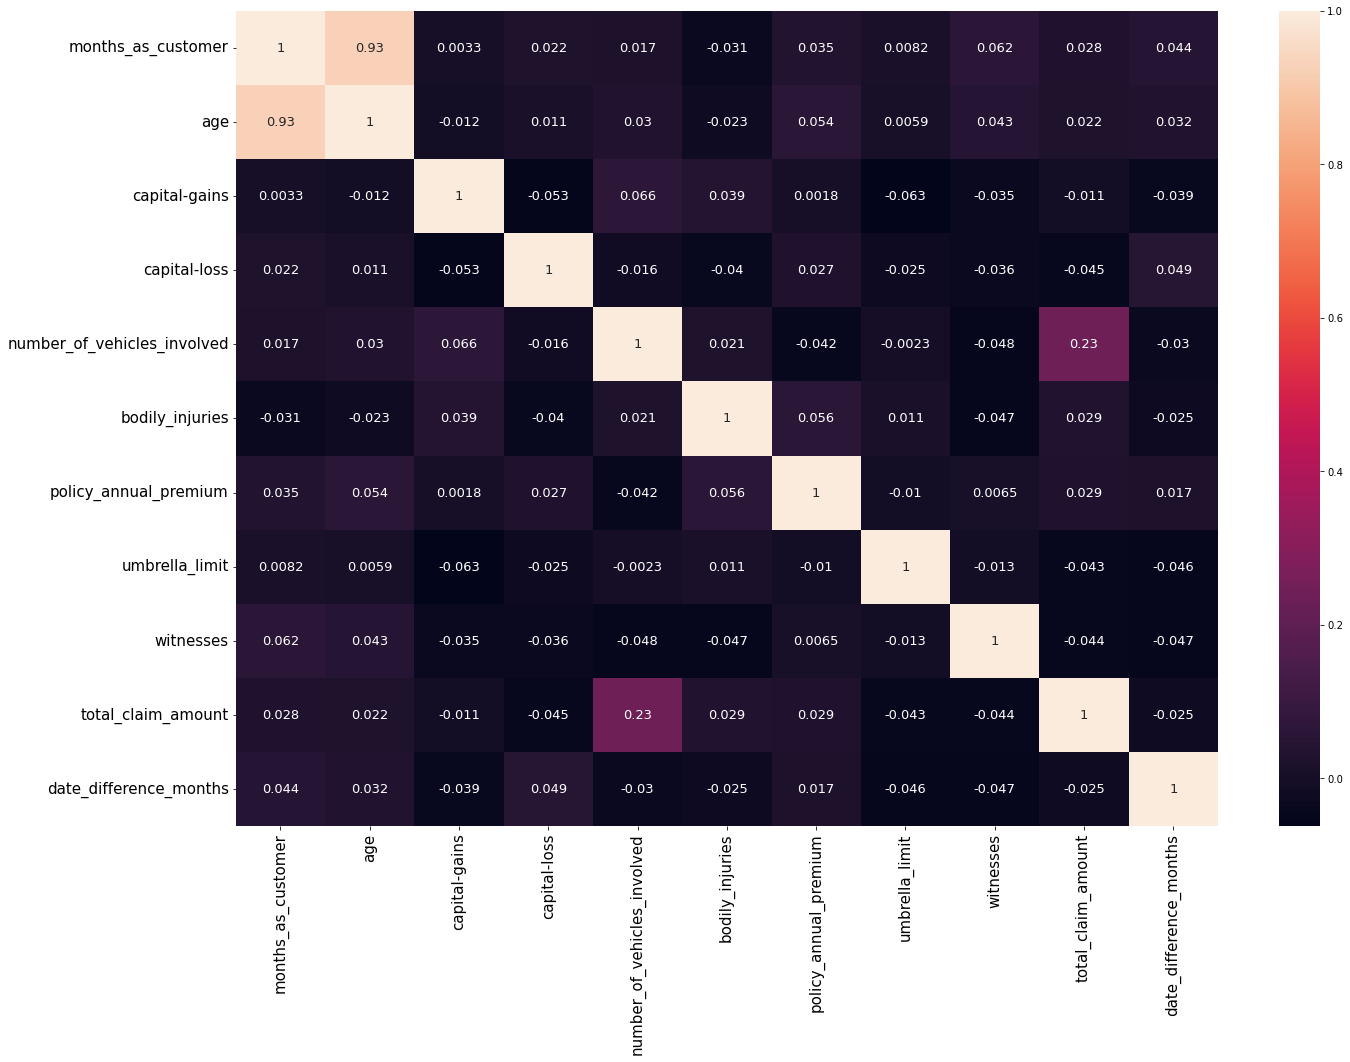

In [67]:
fig,ax = plt.subplots(figsize = (22,15))
sns.heatmap(correlation, annot = True, annot_kws = {'size':13})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('correlation between features.png', dpi = 1000)

Number of vehicles involved shows the highest correlation with the total_claim_amount 
Months_as_customers shows high correlation with age, this can lead to multicollinearity 

In [68]:
df.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_state,policy_csl,policy_deductable,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,policy_annual_premium,umbrella_limit,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,total_claim_amount,date_difference_months
0,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,OH,250/500,1000,6303 1st Drive,22,1,?,0,1325.44,7000000,Parked Car,?,Trivial Damage,Police,NC,Arlington,2,YES,Mercedes,E400,2013,14386.67,15
1,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,IN,500/1000,2000,5585 Washington Drive,14,1,NO,0,1175.70,0,Single Vehicle Collision,Rear Collision,Total Loss,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,76440.00,110
2,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,IN,500/1000,500,1328 Texas Lane,8,3,NO,0,951.46,0,Multi-vehicle Collision,Front Collision,Major Damage,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,79560.00,158
3,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,IN,500/1000,500,6117 4th Ave,21,1,?,0,1021.90,0,Single Vehicle Collision,Front Collision,Major Damage,Other,WV,Columbus,0,?,Toyota,Corolla,2012,121680.00,27
4,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,IL,100/300,2000,2272 Embaracadero Drive,0,3,YES,2,1133.85,0,Multi-vehicle Collision,Front Collision,Total Loss,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,80640.00,132


In [69]:
df['policy_deductable'].unique()

array([1000, 2000, 500], dtype=object)

In [70]:
#checking for null values 

In [71]:
df.isnull().sum()

months_as_customer             0
age                            0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
policy_state                   0
policy_csl                     0
policy_deductable              0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
policy_annual_premium          0
umbrella_limit                 0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
witnesses                      0
police_report_available        0
auto_make                      0
auto_model                     0
auto_year                      0
total_clai

<AxesSubplot:xlabel='policy_annual_premium', ylabel='total_claim_amount'>

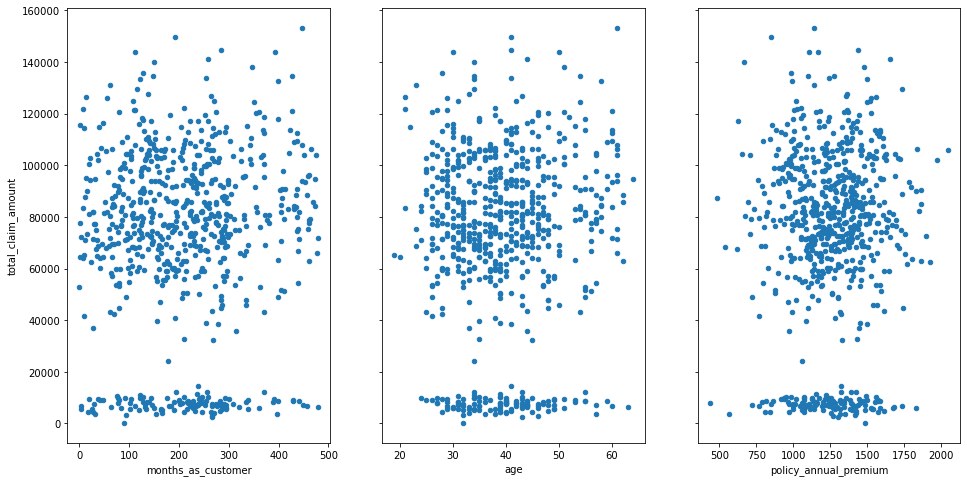

In [72]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='months_as_customer', y='total_claim_amount', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='age', y='total_claim_amount', ax=axs[1])
df.plot(kind='scatter', x='policy_annual_premium', y='total_claim_amount', ax=axs[2])

<AxesSubplot:xlabel='date_difference_months', ylabel='total_claim_amount'>

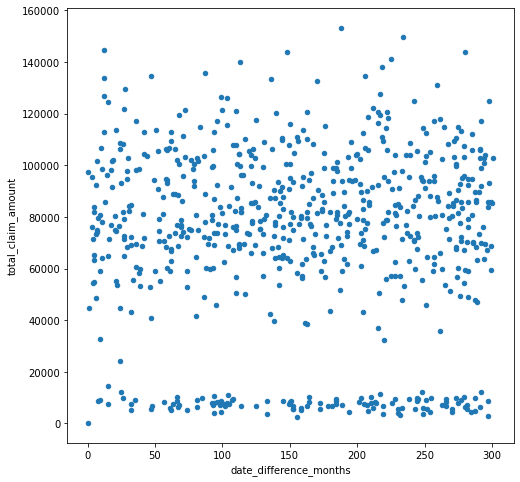

In [73]:
df.plot(kind='scatter', x='date_difference_months', y='total_claim_amount', figsize=(8, 8))

# INSPECTING EACH FEATURE

In [74]:
df['property_damage'].unique()

array(['?', 'NO', 'YES'], dtype=object)

In [75]:
df['property_damage'].replace("?","unknown", inplace=True)

In [76]:
df['property_damage'].unique()

array(['unknown', 'NO', 'YES'], dtype=object)

In [77]:
print(df['collision_type'].unique())

['?' 'Rear Collision' 'Front Collision' 'Side Collision']


In [78]:
df['collision_type'].replace("?","unknown",inplace=True)

In [79]:
print(df['collision_type'].unique())

['unknown' 'Rear Collision' 'Front Collision' 'Side Collision']


In [80]:
df['police_report_available'].unique()

array(['YES', 'NO', '?'], dtype=object)

In [81]:
df['police_report_available'].replace("?","unknown",inplace=True)

In [82]:
df['police_report_available'].unique()

array(['YES', 'NO', 'unknown'], dtype=object)

C:\Users\FolayaniAyodeji\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


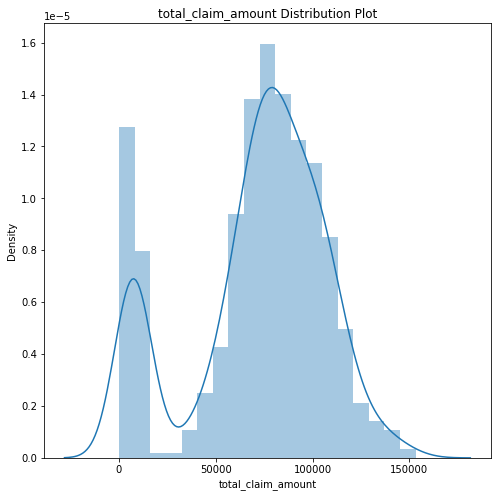

In [85]:
plt.figure(figsize=(8,8))
plt.title('total_claim_amount Distribution Plot')
sns.distplot(df['total_claim_amount'])
plt.savefig('distribution_of_total_claim.png', dpi = 400)

This is not a normal distribution and should be converted to get better results

C:\Users\FolayaniAyodeji\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


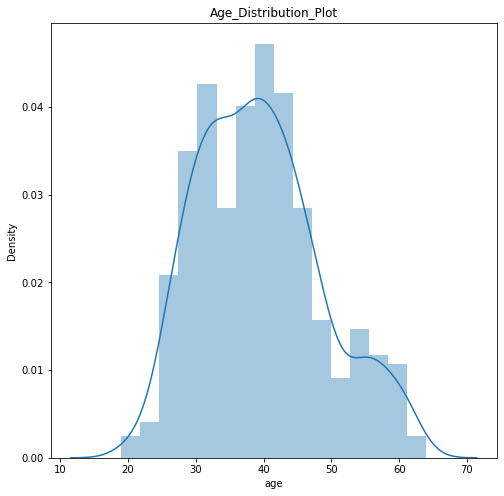

In [86]:
plt.figure(figsize=(8,8))
plt.title('Age_Distribution_Plot')
sns.distplot(df['age'])
plt.savefig('distribution_of_age.png', dpi = 400)

Age is relatively normally distributed. 

INSPECTING CATEGORICAL FEATURES 

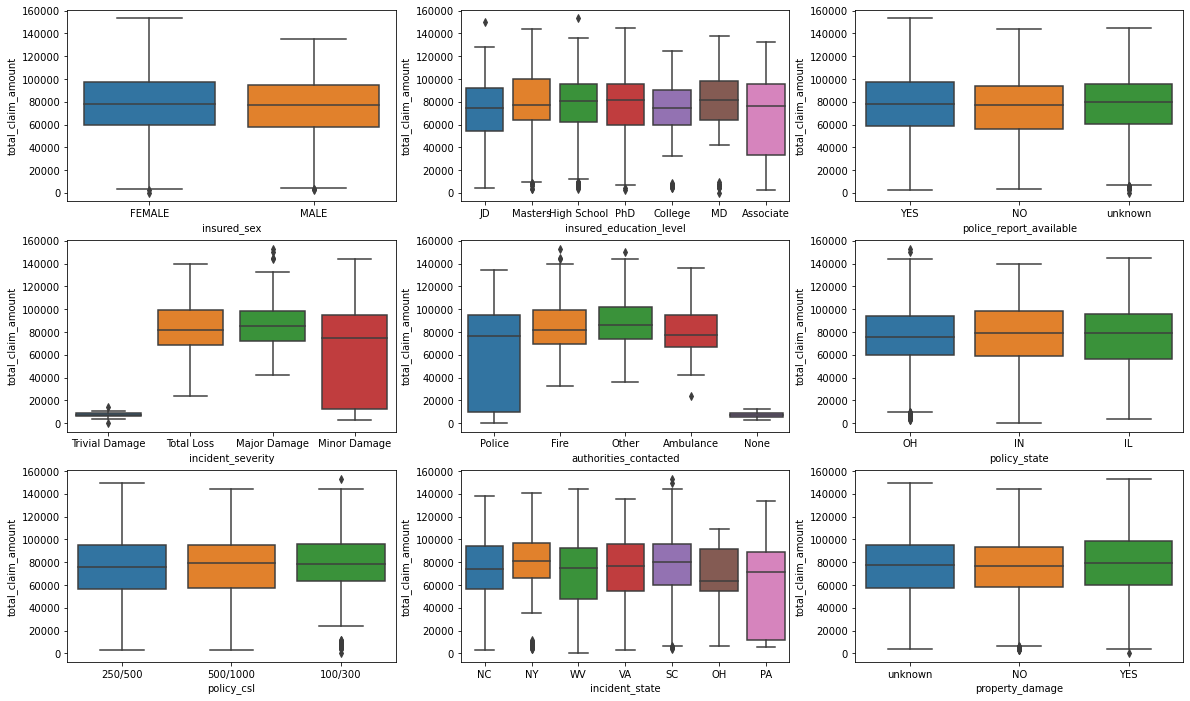

<Figure size 432x288 with 0 Axes>

In [87]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'insured_sex', y = 'total_claim_amount', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'insured_education_level', y = 'total_claim_amount', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'police_report_available', y = 'total_claim_amount', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'incident_severity', y = 'total_claim_amount', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'authorities_contacted', y = 'total_claim_amount', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'policy_state', y = 'total_claim_amount', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'policy_csl', y = 'total_claim_amount', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'incident_state', y = 'total_claim_amount', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'property_damage', y = 'total_claim_amount', data = df)
plt.show()


plt.savefig('box plots.png', dpi = 1000)

insights:
 - Both male and female have similar average total claims, but females have collected the highest amount of claim
 - The highest amount of claim have been collected with police report 
 - As expected, vehicles with trivial damage have generally collected the least claim, while vehicles that had total loss or major damage have a higher mean claim
 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

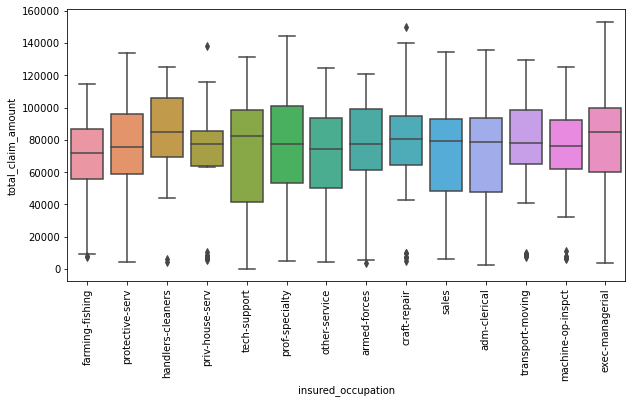

In [102]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'insured_occupation', y = 'total_claim_amount', data = df)
plt.xticks(rotation=90)

The executives/managers seems to have made the highest claim. Maybe This could be attributed to their educational level

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

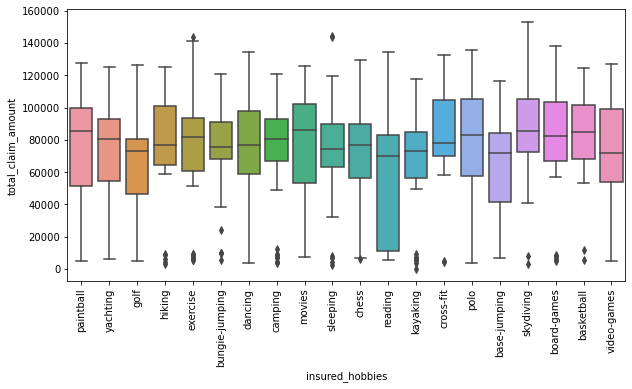

In [103]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'insured_hobbies', y = 'total_claim_amount', data = df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

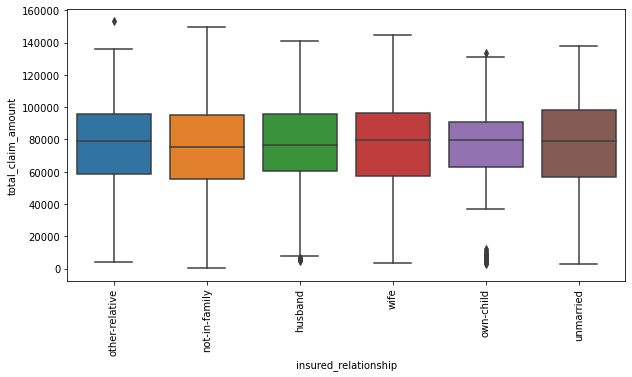

In [104]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'insured_relationship', y = 'total_claim_amount', data = df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

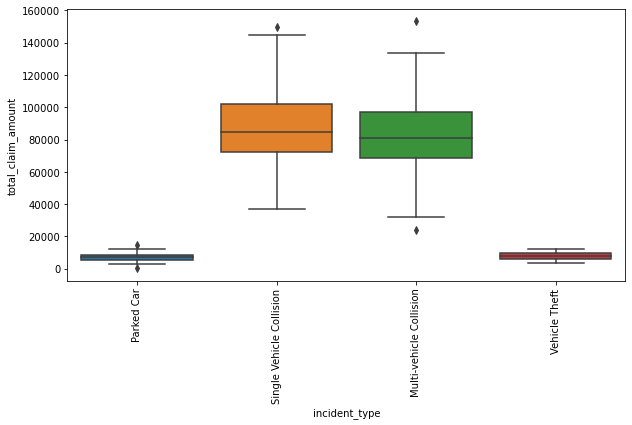

In [105]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'incident_type', y = 'total_claim_amount', data = df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

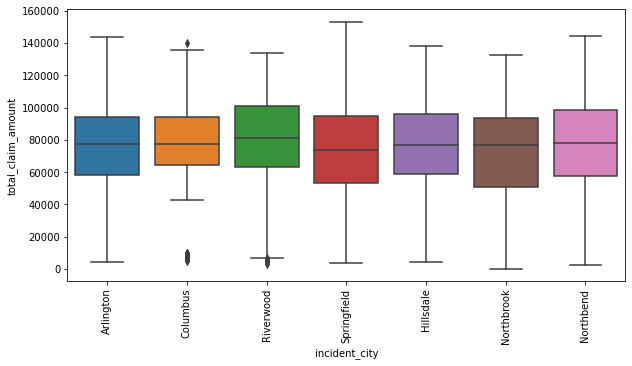

In [106]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'incident_city', y = 'total_claim_amount', data = df)
plt.xticks(rotation=90)

There is no understandable effect of the incident city on the total claim amount 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

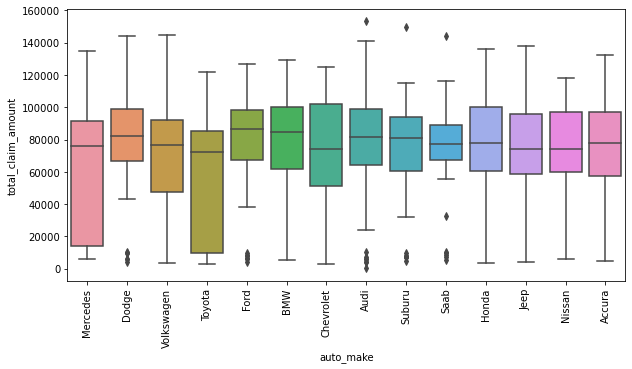

In [107]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'auto_make', y = 'total_claim_amount', data = df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

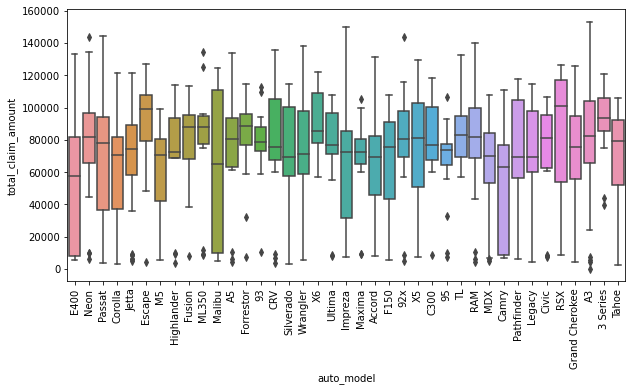

In [108]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'auto_model', y = 'total_claim_amount', data = df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

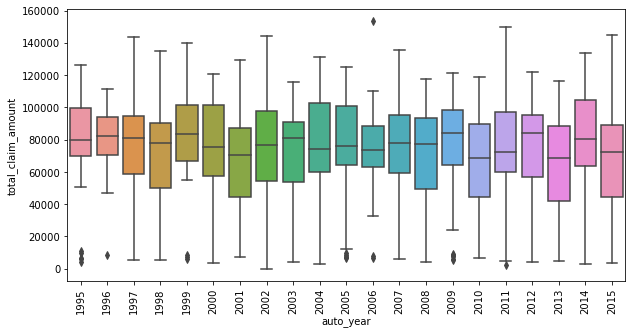

In [109]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'auto_year', y = 'total_claim_amount', data = df)
plt.xticks(rotation=90)

In [88]:
df['auto_year'].value_counts()

1995    47
2011    43
2007    41
2002    38
2009    38
2005    37
1999    37
1997    35
2012    35
2008    35
2000    34
2010    34
2003    33
2013    31
2006    30
2015    28
2014    27
2001    27
1996    24
2004    24
1998    22
Name: auto_year, dtype: int64

Various car year show different effect on total claim amount. The 1995 & 1996 model car claim low amounts, but this could be due to the fact that this car are the least driven by people

In [89]:
df.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_state,policy_csl,policy_deductable,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,policy_annual_premium,umbrella_limit,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,total_claim_amount,date_difference_months
0,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,OH,250/500,1000,6303 1st Drive,22,1,unknown,0,1325.44,7000000,Parked Car,unknown,Trivial Damage,Police,NC,Arlington,2,YES,Mercedes,E400,2013,14386.67,15
1,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,IN,500/1000,2000,5585 Washington Drive,14,1,NO,0,1175.70,0,Single Vehicle Collision,Rear Collision,Total Loss,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,76440.00,110
2,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,IN,500/1000,500,1328 Texas Lane,8,3,NO,0,951.46,0,Multi-vehicle Collision,Front Collision,Major Damage,Other,WV,Riverwood,3,unknown,Volkswagen,Passat,2004,79560.00,158
3,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,IN,500/1000,500,6117 4th Ave,21,1,unknown,0,1021.90,0,Single Vehicle Collision,Front Collision,Major Damage,Other,WV,Columbus,0,unknown,Toyota,Corolla,2012,121680.00,27
4,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,IL,100/300,2000,2272 Embaracadero Drive,0,3,YES,2,1133.85,0,Multi-vehicle Collision,Front Collision,Total Loss,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,80640.00,132


In [306]:
df['total_claim_amount']=np.log(df['total_claim_amount']) #converting the distribution of the total_claim amount

In [307]:
df.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_state,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,total_claim_amount,date_difference_months
0,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,OH,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,9.574057,15
1,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,IN,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,11.244261,110
2,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,IN,...,Other,WV,Riverwood,3,unknown,Volkswagen,Passat,2004,11.284267,158
3,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,IN,...,Other,WV,Columbus,0,unknown,Toyota,Corolla,2012,11.709150,27
4,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,IL,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,11.297750,132


In [309]:
x=df.drop(['total_claim_amount','incident_location'],axis=1) 
#incident location is so much, it would be very complex to label each one

In [310]:
x.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_state,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,date_difference_months
0,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,OH,...,Trivial Damage,Police,NC,Arlington,2,YES,Mercedes,E400,2013,15
1,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,IN,...,Total Loss,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,110
2,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,IN,...,Major Damage,Other,WV,Riverwood,3,unknown,Volkswagen,Passat,2004,158
3,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,IN,...,Major Damage,Other,WV,Columbus,0,unknown,Toyota,Corolla,2012,27
4,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,IL,...,Total Loss,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,132


In [311]:
y=df['total_claim_amount']

In [312]:
y

0       9.574057
1      11.244261
2      11.284267
3      11.709150
4      11.297750
         ...    
695    11.574961
696    11.641612
697    11.270429
698    11.491361
699    10.555813
Name: total_claim_amount, Length: 700, dtype: float64

In [313]:
scaler = preprocessing.StandardScaler()

In [314]:
sig_num_col = ['months_as_customer','policy_annual_premium','age','capital-gains','capital-loss','policy_deductable','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries', 'policy_annual_premium','umbrella_limit','witnesses','date_difference_months']
x[sig_num_col]=scaler.fit_transform(x[sig_num_col])

In [315]:
x.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_state,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,date_difference_months
0,0.257024,0.172727,FEMALE,JD,farming-fishing,paintball,other-relative,0.907981,0.745342,OH,...,Trivial Damage,Police,NC,Arlington,0.492253,YES,Mercedes,E400,2013,-1.626532
1,-0.885443,-0.918509,MALE,Masters,protective-serv,yachting,not-in-family,-0.913479,0.971519,IN,...,Total Loss,Fire,NY,Columbus,0.492253,NO,Dodge,Neon,2006,-0.539846
2,-0.815674,-1.027633,MALE,JD,handlers-cleaners,golf,not-in-family,-0.913479,-0.302969,IN,...,Major Damage,Other,WV,Riverwood,1.375785,unknown,Volkswagen,Passat,2004,0.009216
3,-1.757555,-2.009745,MALE,High School,handlers-cleaners,hiking,husband,-0.913479,0.971519,IN,...,Major Damage,Other,WV,Columbus,-1.274810,unknown,Toyota,Corolla,2012,-1.489266
4,-0.423223,-0.154644,MALE,PhD,priv-house-serv,exercise,not-in-family,1.219826,0.971519,IL,...,Total Loss,Police,WV,Springfield,0.492253,YES,Volkswagen,Jetta,2003,-0.288192


In [316]:
x['auto_year'] = x['auto_year'].astype(object)

In [317]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           700 non-null    float64
 1   age                          700 non-null    float64
 2   insured_sex                  700 non-null    object 
 3   insured_education_level      700 non-null    object 
 4   insured_occupation           700 non-null    object 
 5   insured_hobbies              700 non-null    object 
 6   insured_relationship         700 non-null    object 
 7   capital-gains                700 non-null    float64
 8   capital-loss                 700 non-null    float64
 9   policy_state                 700 non-null    object 
 10  policy_csl                   700 non-null    object 
 11  policy_deductable            700 non-null    float64
 12  incident_hour_of_the_day     700 non-null    float64
 13  number_of_vehicles_i

In [318]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(x[['insured_sex', 'insured_education_level','insured_occupation', 'insured_hobbies','insured_relationship', 'policy_state','policy_csl', 'property_damage','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','police_report_available','auto_make','auto_model','auto_year']]))

In [319]:
# merge with main df bridge_df on key values
enc_df2 = x.join(enc_df)
enc_df2.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_state,...,156,157,158,159,160,161,162,163,164,165
0,0.257024,0.172727,FEMALE,JD,farming-fishing,paintball,other-relative,0.907981,0.745342,OH,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.885443,-0.918509,MALE,Masters,protective-serv,yachting,not-in-family,-0.913479,0.971519,IN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.815674,-1.027633,MALE,JD,handlers-cleaners,golf,not-in-family,-0.913479,-0.302969,IN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.757555,-2.009745,MALE,High School,handlers-cleaners,hiking,husband,-0.913479,0.971519,IN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.423223,-0.154644,MALE,PhD,priv-house-serv,exercise,not-in-family,1.219826,0.971519,IL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [320]:
enc_df2.shape

(700, 196)

In [321]:
enc_df2.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_state,...,156,157,158,159,160,161,162,163,164,165
0,0.257024,0.172727,FEMALE,JD,farming-fishing,paintball,other-relative,0.907981,0.745342,OH,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.885443,-0.918509,MALE,Masters,protective-serv,yachting,not-in-family,-0.913479,0.971519,IN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.815674,-1.027633,MALE,JD,handlers-cleaners,golf,not-in-family,-0.913479,-0.302969,IN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.757555,-2.009745,MALE,High School,handlers-cleaners,hiking,husband,-0.913479,0.971519,IN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.423223,-0.154644,MALE,PhD,priv-house-serv,exercise,not-in-family,1.219826,0.971519,IL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [322]:
x_encoded = enc_df2.drop(['insured_sex', 'insured_education_level','insured_occupation', 'insured_hobbies','insured_relationship', 'policy_state','policy_csl', 'property_damage','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','police_report_available','auto_make','auto_model','auto_year'], axis = 'columns')

In [323]:
x_encoded.shape

(700, 178)

# Using pd.get_dummies()

In [275]:
x_encoded = pd.get_dummies(x,columns= ['insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','policy_state','policy_csl','property_damage','bodily_injuries','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','police_report_available','auto_make','auto_model','auto_year'], drop_first = True)

In [277]:
x_encoded.head()

,months_as_customer,age,capital-gains,capital-loss,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,policy_annual_premium,umbrella_limit,witnesses,date_difference_months,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,...,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,auto_year_1996,auto_year_1997,auto_year_1998,auto_year_1999,auto_year_2000,auto_year_2001,auto_year_2002,auto_year_2003,auto_year_2004,auto_year_2005,auto_year_2006,auto_year_2007,auto_year_2008,auto_year_2009,auto_year_2010,auto_year_2011,auto_year_2012,auto_year_2013,auto_year_2014,auto_year_2015
0,239,41,51400,-6300,1000,22,1,1325.44,7000000,2,15,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,108,31,0,0,2000,14,1,1175.70,0,2,110,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,116,30,0,-35500,500,8,3,951.46,0,3,158,1,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,8,21,0,0,500,21,1,1021.90,0,0,27,1,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,161,38,60200,0,2000,0,3,1133.85,0,2,132,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# splitting the data into train and test set 

In [324]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size = 0.20,random_state = 10)

# Linear Regression

In [325]:
linear_model = LinearRegression()
cv_results_linear_model = cross_val_score(linear_model, x_train, y_train, cv=15)

In [326]:
cv_results_linear_model

array([0.84196524, 0.93161674, 0.87237709, 0.87370519, 0.92776909,
       0.88210106, 0.66776572, 0.81243296, 0.510245  , 0.81050145,
       0.80477187, 0.89941117, 0.91488107, 0.92141874, 0.88574938])

In [327]:
cv_results_linear_model.mean()

0.8371141174531674

In [328]:
##Fitting the model

In [329]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [330]:
y_pred =linear_model.predict(x_test)

In [331]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)
mse=mean_squared_error(y_test,y_pred)
print(mse)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)

0.8497630771199016
0.28575282853180567
0.12601283971148156
0.35498287241989795


# Random forest

In [332]:
randomforest = RandomForestRegressor(bootstrap=False, max_depth=1, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=20, n_jobs=-1)

In [333]:
cv_results_randomforest = cross_val_score(randomforest, x_train, y_train, cv=15)

In [334]:
cv_results_randomforest

array([0.92044529, 0.94911402, 0.92609409, 0.91372161, 0.94668671,
       0.9204806 , 0.68208468, 0.87853499, 0.7080366 , 0.85082901,
       0.89181541, 0.93154055, 0.95096254, 0.94206901, 0.90420555])

In [335]:
cv_results_randomforest.mean()

0.8877747109852715

In [336]:
randomforest = RandomForestRegressor(bootstrap=False, max_depth=1, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=20, n_jobs=-1)

In [337]:
randomforest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=1, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=20, n_jobs=-1)

In [338]:
y_pred = randomforest.predict(x_test)

In [339]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)
mse=mean_squared_error(y_test,y_pred)
print(mse)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)

0.9000598728140133
0.22515927866245744
0.08382585975808139
0.28952695860330757


# XGB REGRESSOR

In [341]:
from xgboost import XGBRegressor
XGBRegressor = XGBRegressor(use_label_encoder = False)

In [342]:
cv_XGBRegressor = cross_val_score(XGBRegressor, x_train, y_train, cv=15)

In [343]:
cv_XGBRegressor

array([0.90077393, 0.90890254, 0.90310985, 0.89519509, 0.93773757,
       0.90672555, 0.6772472 , 0.89377562, 0.60568406, 0.84004962,
       0.86207445, 0.899718  , 0.91143978, 0.94575493, 0.88437455])

In [344]:
cv_XGBRegressor.mean()

0.8648375161262908

In [345]:
from xgboost import XGBRegressor
XGBRegressor = XGBRegressor()

In [346]:
XGBRegressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [347]:
y_pred = XGBRegressor.predict(x_test)

In [348]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)
mse=mean_squared_error(y_test,y_pred)
print(mse)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)

0.8733055401972775
0.25158711698477043
0.10626634484649769
0.32598519114600544


# Decision Tree Regressor

In [401]:
DecisionTreeRegressor = DecisionTreeRegressor()

In [350]:
cv_DecisionTreeRegressor = cross_val_score(DecisionTreeRegressor, x_train, y_train, cv=15)

In [351]:
cv_DecisionTreeRegressor

array([0.78658881, 0.85602853, 0.84016975, 0.84427362, 0.87403004,
       0.8018408 , 0.71777097, 0.70508579, 0.22693647, 0.6784171 ,
       0.83376369, 0.88831848, 0.81609081, 0.78417658, 0.81832397])

In [352]:
cv_DecisionTreeRegressor.mean()

0.7647876933635658

In [404]:
DecisionTreeRegressor = DecisionTreeRegressor()

In [354]:
DecisionTreeRegressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [355]:
y_pred = DecisionTreeRegressor.predict(x_test)

In [356]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)
mse=mean_squared_error(y_test,y_pred)
print(mse)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)

0.8062383876165605
0.30232471830657937
0.16251964254485524
0.40313725025709946


# TRAINING WITH BEST MODEL

In [357]:
randomforest = RandomForestRegressor(bootstrap=False, max_depth=1, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=20, n_jobs=-1)

In [358]:
randomforest.fit(x_encoded,y)

RandomForestRegressor(bootstrap=False, max_depth=1, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=20, n_jobs=-1)

# LOADING THE TEST DATA

In [359]:
df_test=pd.read_csv('test.csv')

In [360]:
df_test.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,...,Total Loss,Ambulance,WV,Springfield,3,?,Audi,A5,2003,NaN
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,...,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,NaN
2,Customer_740,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,...,Minor Damage,Other,WV,Riverwood,3,?,Suburu,Legacy,2007,NaN
3,Customer_660,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,...,Total Loss,Police,SC,Northbrook,0,NO,Jeep,Wrangler,2012,NaN
4,Customer_411,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,...,Trivial Damage,Police,SC,Arlington,0,YES,BMW,3 Series,2005,NaN


In [361]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  300 non-null    object 
 1   months_as_customer           300 non-null    int64  
 2   age                          300 non-null    int64  
 3   insured_sex                  300 non-null    object 
 4   insured_education_level      300 non-null    object 
 5   insured_occupation           300 non-null    object 
 6   insured_hobbies              300 non-null    object 
 7   insured_relationship         300 non-null    object 
 8   capital-gains                300 non-null    int64  
 9   capital-loss                 300 non-null    int64  
 10  policy_number                300 non-null    int64  
 11  policy_bind_date             300 non-null    object 
 12  policy_state                 300 non-null    object 
 13  policy_csl          

In [362]:
df_test['policy_bind_date'] = pd.to_datetime(df_test['policy_bind_date'],format="%Y/%m/%d")

In [363]:
df_test['incident_date'] =  pd.to_datetime(df_test['incident_date'],format="%Y/%m/%d")

In [364]:
df_test['date_difference_months'] = ((df_test.incident_date - df_test.policy_bind_date)/np.timedelta64(1, 'M'))

In [365]:
df_test['date_difference_months'] = df_test['date_difference_months'].astype(int)

In [366]:
df_test.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,date_difference_months
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,...,Ambulance,WV,Springfield,3,?,Audi,A5,2003,NaN,5
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,...,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,NaN,71
2,Customer_740,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,...,Other,WV,Riverwood,3,?,Suburu,Legacy,2007,NaN,295
3,Customer_660,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,...,Police,SC,Northbrook,0,NO,Jeep,Wrangler,2012,NaN,266
4,Customer_411,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,...,Police,SC,Arlington,0,YES,BMW,3 Series,2005,NaN,142


In [369]:
df_test_main=df_test.drop(['Customer_ID','policy_bind_date','insured_zip','incident_date','_c39','policy_number','incident_location'], axis =1)

In [370]:
df_test_main.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_state,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,date_difference_months
0,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,IL,...,Total Loss,Ambulance,WV,Springfield,3,?,Audi,A5,2003,5
1,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,IL,...,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,71
2,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,IN,...,Minor Damage,Other,WV,Riverwood,3,?,Suburu,Legacy,2007,295
3,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,IN,...,Total Loss,Police,SC,Northbrook,0,NO,Jeep,Wrangler,2012,266
4,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,OH,...,Trivial Damage,Police,SC,Arlington,0,YES,BMW,3 Series,2005,142


In [371]:
df_test_main = df_test_main.astype({'auto_year':'object','incident_hour_of_the_day':'object'})

In [372]:
#df_test_main.profile_report()

In [373]:
df_test_main['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [374]:
df_test_main['property_damage'].replace("?","unknown", inplace=True)

In [375]:
df_test_main['property_damage'].unique()

array(['YES', 'unknown', 'NO'], dtype=object)

In [376]:
df_test_main['collision_type'].replace("?","unknown",inplace=True)

In [377]:
print(df_test_main['collision_type'].unique())

['Rear Collision' 'Front Collision' 'unknown' 'Side Collision']


In [378]:
df_test_main['police_report_available'].replace("?","unknown",inplace=True)

In [379]:
df_test_main['police_report_available'].unique()

array(['unknown', 'YES', 'NO'], dtype=object)

In [380]:
df_test_main.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_state,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,date_difference_months
0,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,IL,...,Total Loss,Ambulance,WV,Springfield,3,unknown,Audi,A5,2003,5
1,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,IL,...,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,71
2,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,IN,...,Minor Damage,Other,WV,Riverwood,3,unknown,Suburu,Legacy,2007,295
3,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,IN,...,Total Loss,Police,SC,Northbrook,0,NO,Jeep,Wrangler,2012,266
4,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,OH,...,Trivial Damage,Police,SC,Arlington,0,YES,BMW,3 Series,2005,142


In [381]:
df_test_main.columns

Index(['months_as_customer', 'age', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'policy_state', 'policy_csl',
       'policy_deductable', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'policy_annual_premium', 'umbrella_limit', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'auto_year',
       'date_difference_months'],
      dtype='object')

In [382]:
df_test_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           300 non-null    int64  
 1   age                          300 non-null    int64  
 2   insured_sex                  300 non-null    object 
 3   insured_education_level      300 non-null    object 
 4   insured_occupation           300 non-null    object 
 5   insured_hobbies              300 non-null    object 
 6   insured_relationship         300 non-null    object 
 7   capital-gains                300 non-null    int64  
 8   capital-loss                 300 non-null    int64  
 9   policy_state                 300 non-null    object 
 10  policy_csl                   300 non-null    object 
 11  policy_deductable            300 non-null    int64  
 12  incident_hour_of_the_day     300 non-null    object 
 13  number_of_vehicles_i

In [383]:
scaler = preprocessing.StandardScaler()

In [384]:
sig_num_col1 = ['months_as_customer','policy_annual_premium','age','capital-gains','capital-loss','policy_deductable','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries', 'policy_annual_premium','umbrella_limit','witnesses','date_difference_months']
df_test_main[sig_num_col1]=scaler.fit_transform(df_test_main[sig_num_col1])

In [385]:
df_test_main

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_state,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,date_difference_months
0,-1.618097,-1.320751,FEMALE,PhD,farming-fishing,skydiving,not-in-family,0.293062,0.914306,IL,...,Total Loss,Ambulance,WV,Springfield,1.339178,unknown,Audi,A5,2003,-1.619321
1,-0.269296,-0.540780,FEMALE,High School,exec-managerial,exercise,husband,1.410516,0.914306,IL,...,Total Loss,Ambulance,NC,Riverwood,1.339178,YES,Nissan,Pathfinder,2006,-0.885036
2,1.688640,1.464859,FEMALE,MD,craft-repair,reading,husband,-0.876365,-1.216862,IN,...,Minor Damage,Other,WV,Riverwood,1.339178,unknown,Suburu,Legacy,2007,1.607083
3,2.219459,2.133406,MALE,College,adm-clerical,sleeping,unmarried,0.708859,-1.353117,IN,...,Total Loss,Police,SC,Northbrook,-1.510137,NO,Jeep,Wrangler,2012,1.284442
4,-0.930643,-0.986477,FEMALE,High School,machine-op-inspct,video-games,not-in-family,-0.876365,-0.130316,OH,...,Trivial Damage,Police,SC,Arlington,-1.510137,YES,BMW,3 Series,2005,-0.095123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.296330,-0.095082,FEMALE,High School,farming-fishing,yachting,not-in-family,0.965019,0.914306,OH,...,Minor Damage,Fire,WV,Northbrook,0.389406,NO,Volkswagen,Passat,2015,0.216392
296,-0.321508,-0.429355,FEMALE,JD,priv-house-serv,cross-fit,husband,1.094956,-0.619436,OH,...,Total Loss,Other,WV,Hillsdale,1.339178,YES,Toyota,Highlander,2005,0.361023
297,-0.208382,-0.206507,FEMALE,Masters,exec-managerial,camping,other-relative,-0.876365,-0.427282,IL,...,Major Damage,Ambulance,NC,Springfield,-1.510137,NO,Mercedes,ML350,2008,1.117559
298,-0.225786,-0.095082,MALE,Associate,tech-support,base-jumping,unmarried,-0.876365,0.914306,IL,...,Total Loss,Police,VA,Columbus,0.389406,YES,Audi,A5,2015,1.662710


In [386]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df_test_main[['insured_sex', 'insured_education_level','insured_occupation', 'insured_hobbies','insured_relationship', 'policy_state','policy_csl', 'property_damage','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','police_report_available','auto_make','auto_model','auto_year']]))

In [387]:
# merge with main df bridge_df on key values
enc_df2 = df_test_main.join(enc_df)
enc_df2.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_state,...,156,157,158,159,160,161,162,163,164,165
0,-1.618097,-1.320751,FEMALE,PhD,farming-fishing,skydiving,not-in-family,0.293062,0.914306,IL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.269296,-0.540780,FEMALE,High School,exec-managerial,exercise,husband,1.410516,0.914306,IL,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.688640,1.464859,FEMALE,MD,craft-repair,reading,husband,-0.876365,-1.216862,IN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.219459,2.133406,MALE,College,adm-clerical,sleeping,unmarried,0.708859,-1.353117,IN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.930643,-0.986477,FEMALE,High School,machine-op-inspct,video-games,not-in-family,-0.876365,-0.130316,OH,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
x_test_encoded = enc_df2.drop(['insured_sex', 'insured_education_level','insured_occupation', 'insured_hobbies','insured_relationship', 'policy_state','policy_csl', 'property_damage','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','police_report_available','auto_make','auto_model','auto_year'], axis = 'columns')

In [389]:
x_test_encoded

,months_as_customer,age,capital-gains,capital-loss,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,policy_annual_premium,umbrella_limit,...,156,157,158,159,160,161,162,163,164,165
0,-1.618097,-1.320751,0.293062,0.914306,1.465184,1.544577,-0.843551,0.036494,-0.511399,-0.483814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.269296,-0.540780,1.410516,0.914306,-0.202957,0.815774,1.103106,1.252965,0.725834,-0.483814,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.688640,1.464859,-0.876365,-1.216862,-0.202957,0.378492,1.103106,0.036494,-1.206953,-0.483814,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.219459,2.133406,0.708859,-1.353117,1.465184,-0.204551,1.103106,-1.179976,0.511214,-0.483814,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.930643,-0.986477,-0.876365,-0.130316,-0.202957,-0.787593,-0.843551,1.252965,-0.597342,-0.483814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.296330,-0.095082,0.965019,0.914306,-0.202957,1.107295,1.103106,1.252965,-0.161479,1.676072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
296,-0.321508,-0.429355,1.094956,-0.619436,-0.202957,0.961534,2.076434,1.252965,-0.925571,-0.483814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,-0.208382,-0.206507,-0.876365,-0.427282,-0.202957,1.544577,1.103106,-1.179976,-1.323550,-0.483814,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,-0.225786,-0.095082,-0.876365,0.914306,-0.202957,1.690338,1.103106,1.252965,-0.511356,-0.483814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [390]:
x_test_encoded.shape

(300, 178)

In [391]:
y_pred = randomforest.predict(x_test_encoded)

In [392]:
y_pred

array([11.31466198, 11.31466198, 11.31466198, 11.31466198,  8.84026706,
       11.31466198, 11.31466198, 11.31466198, 11.31466198,  8.84026706,
        8.84026706, 11.31466198,  8.84026706, 11.31466198, 11.31466198,
        8.84026706, 11.31466198, 11.31466198, 11.31466198, 11.31466198,
       11.31466198,  8.84026706, 11.31466198,  8.84026706,  8.84026706,
       11.31466198, 11.31466198, 11.31466198, 11.31466198, 11.31466198,
       11.31466198, 11.31466198, 11.31466198, 11.31466198, 11.31466198,
       11.31466198, 11.31466198,  8.84026706, 11.31466198, 11.31466198,
       11.31466198, 11.31466198, 11.31466198, 11.31466198, 11.31466198,
       11.31466198, 11.31466198, 11.31466198,  8.84026706,  8.84026706,
       11.31466198, 11.31466198, 11.31466198, 11.31466198, 11.31466198,
       11.31466198, 11.31466198, 11.31466198, 11.31466198,  8.84026706,
       11.31466198,  8.84026706, 11.31466198,  8.84026706, 11.31466198,
        8.84026706, 11.31466198, 11.31466198, 11.31466198, 11.31

In [393]:
Predicted_total_claim_amount = np.exp(y_pred)

In [1895]:
#df_test['total_claim_amount'] = y_pred

In [394]:
df_test['total_claim_amount'] =Predicted_total_claim_amount 

In [395]:
df_test

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,date_difference_months,total_claim_amount
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,...,WV,Springfield,3,?,Audi,A5,2003,NaN,5,82015.372787
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,...,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,NaN,71,82015.372787
2,Customer_740,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,...,WV,Riverwood,3,?,Suburu,Legacy,2007,NaN,295,82015.372787
3,Customer_660,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,...,SC,Northbrook,0,NO,Jeep,Wrangler,2012,NaN,266,82015.372787
4,Customer_411,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,...,SC,Arlington,0,YES,BMW,3 Series,2005,NaN,142,6906.836908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Customer_468,225,37,FEMALE,High School,farming-fishing,yachting,not-in-family,49600,0,...,WV,Northbrook,2,NO,Volkswagen,Passat,2015,NaN,170,82015.372787
296,Customer_935,154,34,FEMALE,JD,priv-house-serv,cross-fit,husband,53100,-43900,...,WV,Hillsdale,3,YES,Toyota,Highlander,2005,NaN,183,82015.372787
297,Customer_428,167,36,FEMALE,Masters,exec-managerial,camping,other-relative,0,-38400,...,NC,Springfield,0,NO,Mercedes,ML350,2008,NaN,251,82015.372787
298,Customer_7,165,37,MALE,Associate,tech-support,base-jumping,unmarried,0,0,...,VA,Columbus,2,YES,Audi,A5,2015,NaN,300,82015.372787


In [396]:
prediction= df_test[['Customer_ID','total_claim_amount']]

In [397]:
prediction

,Customer_ID,total_claim_amount
0,Customer_521,82015.372787
1,Customer_737,82015.372787
2,Customer_740,82015.372787
3,Customer_660,82015.372787
4,Customer_411,6906.836908
...,...,...
295,Customer_468,82015.372787
296,Customer_935,82015.372787
297,Customer_428,82015.372787
298,Customer_7,82015.372787


In [398]:
prediction.to_csv('Folayan LateRegression2022.csv', index=False)